In [1]:
from analysis import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import os
import sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

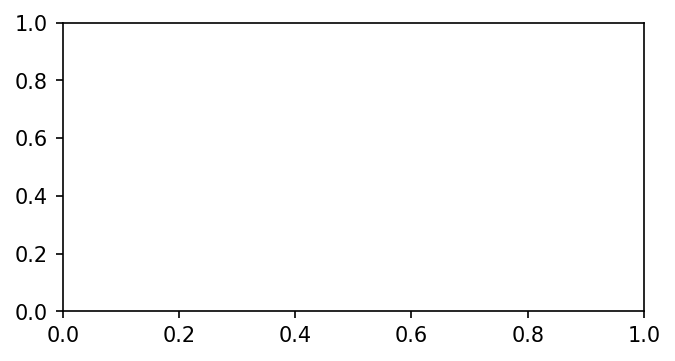

In [2]:
fig, ax = plt.subplots(figsize=(5,2.5),dpi=150)
plt.subplots_adjust(wspace=0.1)

In [2]:
q_set = np.array([[0.05, 5], [0.1786, 15], [0.3071, 27], [0.4357, 39], 
                  [0.5643, 52], [0.6929, 67], [0.8214, 80], [0.95, 102]])
q_thresh = [j for (i,j) in q_set]
data_path = "arm3_q/data"
files = get_files_in_directory(data_path)
N = len(files)

5de42a01a7cb2401ccc682c3 : Exceeded 2/3rds of DP algorithm score 
Accuracy: 0.579
5f0af097e7d15b3bf7734642 : Exceeded 2/3rds of DP algorithm score 
Accuracy: 0.584
5e8654505276a10fe5e2633b : Exceeded 2/3rds of DP algorithm score 
Accuracy: 0.543
60d7078c3e724cb9020fe786 : No bonus 
Accuracy: 0.566
61545727036ae019fdeea5df : No bonus 
Accuracy: 0.605
60e5ccdf4263ab147e71b284 : No bonus 
Accuracy: 0.647
60e4a5d4b0e40567e60146e4 : Exceeded bonus threshold 
Accuracy: 0.626
612a736e7035ad7ceeef755e : No bonus 
Accuracy: 0.637
616a8502cf9f59ac63569662 : No bonus 
Accuracy: 0.637
5f3ee36d0306de1a411882a5 : Exceeded bonus threshold 
Accuracy: 0.643
605bb96c5facde74270615aa : Exceeded bonus threshold 
Accuracy: 0.628
5fc26815a9eca13fd5362ba3 : Exceeded bonus threshold 
Accuracy: 0.596
6120d90a0d83120b87086355 : Exceeded bonus threshold 
Accuracy: 0.592
5baba8dbc1155b0001174533 : Exceeded bonus threshold 
Accuracy: 0.572
63ea8ec521931832f4b6b7cb : No bonus 
Accuracy: 0.59
6445101fd46dd4427dfec91

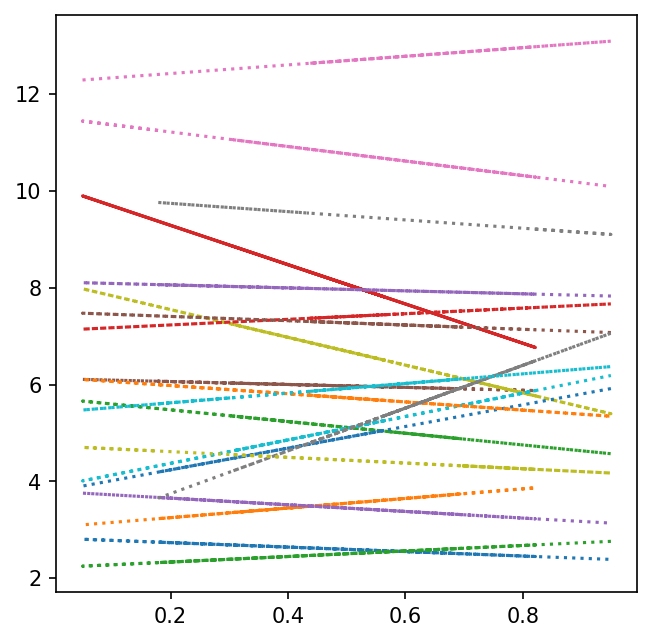

In [3]:
fig, ax = plt.subplots(figsize=(5,5),dpi=150)
plt.subplots_adjust(wspace=0.1)
pop_acc = []
for f in files:
    pid, df, acc = load(f, q_thresh)
    pop_acc.append(acc)
pop_mean_acc = np.mean(pop_acc)
for f in files:
    pid, df, acc = load(f, q_thresh)
    if np.abs(acc - pop_mean_acc) < 1.25*np.std(pop_acc):
        q, __, mu_i, __ = get_mean_iai(df)
        x,y,l = get_linear_fit(q,mu_i)
        plt.plot(x,y, linestyle = l)